In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [5]:
df=pd.read_csv("./data_clean/normalized_vol.csv")

In [7]:
import pandas as pd

# 假设数据已加载到 DataFrame 中
# df = pd.read_csv("your_data.csv")  # 替换为实际文件路径
print(df.head())

              datetime contract symbol exchange      open      high       low  \
0  2017-01-03 09:00:00   SM1705     SM     CZCE  0.254069  0.249790  0.253348   
1  2017-01-03 09:01:00   SM1705     SM     CZCE  0.253045  0.249035  0.254378   
2  2017-01-03 09:02:00   SM1705     SM     CZCE  0.253642  0.249790  0.255151   
3  2017-01-03 09:03:00   SM1705     SM     CZCE  0.254410  0.251720  0.255580   
4  2017-01-03 09:04:00   SM1705     SM     CZCE  0.255946  0.252223  0.257040   

      close  openinterest    volume  amount  
0  0.252874     -0.471365 -0.255511       0  
1  0.253301     -0.471307 -0.276446       0  
2  0.254069     -0.471259 -0.275214       0  
3  0.255946     -0.471302 -0.276035       0  
4  0.256117     -0.471355 -0.262900       0  


In [8]:
from statsmodels.tsa.stattools import adfuller

# 提取 close 列并设置时间索引
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
close_series = df['close']

# ADF 检验
result = adfuller(close_series)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -14.626091710333588
p-value: 3.8168357888814895e-27


In [10]:
df.head()

,contract,symbol,exchange,open,high,low,close,openinterest,volume,amount
datetime,,,,,,,,,,
2017-01-03 09:00:00,SM1705,SM,CZCE,0.254069,0.249790,0.253348,0.252874,-0.471365,-0.255511,0
2017-01-03 09:01:00,SM1705,SM,CZCE,0.253045,0.249035,0.254378,0.253301,-0.471307,-0.276446,0
2017-01-03 09:02:00,SM1705,SM,CZCE,0.253642,0.249790,0.255151,0.254069,-0.471259,-0.275214,0
2017-01-03 09:03:00,SM1705,SM,CZCE,0.254410,0.251720,0.255580,0.255946,-0.471302,-0.276035,0
2017-01-03 09:04:00,SM1705,SM,CZCE,0.255946,0.252223,0.257040,0.256117,-0.471355,-0.262900,0


In [12]:
df.columns.tolist()

['contract',
 'symbol',
 'exchange',
 'open',
 'high',
 'low',
 'close',
 'openinterest',
 'volume',
 'amount']

In [17]:
print(df.index.name)       # 输出: 'datetime'

datetime


In [18]:
df2 = df.reset_index()
print(df2.columns.tolist())
# ['datetime', 'contract', 'symbol', ...]


['datetime', 'contract', 'symbol', 'exchange', 'open', 'high', 'low', 'close', 'openinterest', 'volume', 'amount']


In [19]:
df=df2

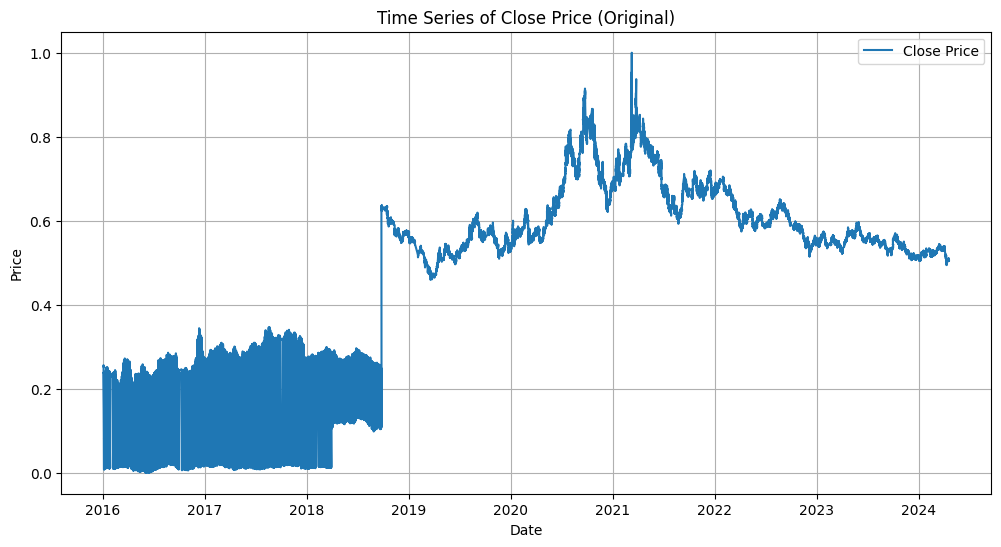

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设原始数据已加载到 DataFrame 中
# df = pd.read_csv("your_data.csv")
# 设置时间索引
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# 绘制时序图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['close'], label='Close Price')
plt.title('Time Series of Close Price (Original)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

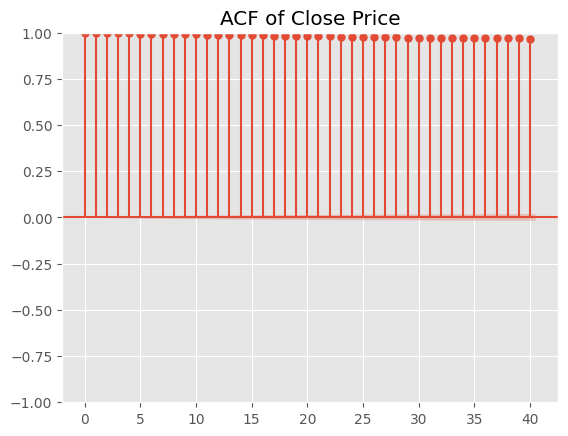

<Figure size 1200x600 with 0 Axes>

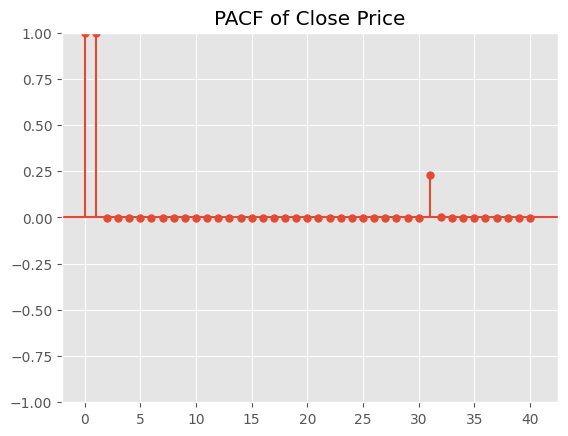

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 绘制 ACF 图（自相关图）
plt.figure(figsize=(12, 6))
plot_acf(df['close'], lags=40, alpha=0.05, title='ACF of Close Price')
plt.show()

# 绘制 PACF 图（偏自相关图）
plt.figure(figsize=(12, 6))
plot_pacf(df['close'], lags=40, alpha=0.05, title='PACF of Close Price')
plt.show()

In [28]:
from pmdarima import auto_arima
model = auto_arima(df['close'], stepwise=True, trace=True)
print(model.order)  # 输出 (p, d, q)

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.w

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-5650103.313, Time=104.26 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-5650111.313, Time=55.34 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-5650109.356, Time=65.38 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5650109.356, Time=65.58 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-5650113.312, Time=26.14 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-5650107.357, Time=64.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 380.944 seconds
(0, 1, 0)


In [29]:
print(model.summary())  # 打印模型详细信息

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:               846105
Model:               SARIMAX(0, 1, 0)   Log Likelihood             2825057.656
Date:                Thu, 01 May 2025   AIC                       -5650113.312
Time:                        16:03:36   BIC                       -5650101.664
Sample:                             0   HQIC                      -5650110.085
                             - 846105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.369e-05   5.92e-09   1.24e+04      0.000    7.37e-05    7.37e-05
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):       18788150641.61
Prob(Q):                              0.84   Pr

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['close'].diff().dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -108.79085130118095
p-value: 0.0


In [31]:
from statsmodels.stats.diagnostic import acorr_ljungbox
model = ARIMA(df['close'], order=(0,1,0)).fit()
lb_test = acorr_ljungbox(model.resid, lags=10, return_df=True)
print(lb_test)

/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/p

     lb_stat  lb_pvalue
1   0.041886   0.837838
2   0.042930   0.978764
3   0.044009   0.997577
4   0.044750   0.999753
5   0.047935   0.999974
6   0.048578   0.999998
7   0.051186   1.000000
8   0.051584   1.000000
9   0.051620   1.000000
10  0.051627   1.000000


In [32]:
from statsmodels.tsa.stattools import adfuller

# 对差分后的数据进行 ADF 检验
result_diff = adfuller(df['close'].diff().dropna())
print('差分后 ADF Statistic:', result_diff[0])
print('差分后 p-value:', result_diff[1])

差分后 ADF Statistic: -108.79085130118095
差分后 p-value: 0.0


In [33]:
from pmdarima import auto_arima

# 强制 d=0，搜索最佳 (p, q)
model = auto_arima(df['close'], d=0, stepwise=True, trace=True)
print(model.order)  # 输出 (p, 0, q)

/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=648.50 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-305501.556, Time=45.19 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=38.86 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1434217.296, Time=85.40 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1338634.523, Time=15.85 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5650490.069, Time=52.32 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=523.21 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-5650488.214, Time=70.61 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-2354250.144, Time=137.55 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=52.91 sec


/root/miniconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-5650162.910, Time=33.57 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1703.998 seconds
(1, 0, 1)


In [34]:
from statsmodels.tsa.stattools import kpss
kpss_result = kpss(df['close'])
print('KPSS Statistic:', kpss_result[0])
print('KPSS p-value:', kpss_result[1])

KPSS Statistic: 102.03844521119726
KPSS p-value: 0.01


/tmp/ipykernel_1146/3256241944.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['close'])


In [35]:
from statsmodels.stats.diagnostic import acorr_ljungbox
model = ARIMA(df['close'], order=(1,0,1)).fit()
lb_test = acorr_ljungbox(model.resid, lags=10, return_df=True)
print(lb_test)

/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/miniconda3/lib/p

         lb_stat  lb_pvalue
1   5.481244e-07   0.999409
2   1.424870e-01   0.931235
3   3.309299e-01   0.954110
4   4.799769e-01   0.975421
5   7.020096e-01   0.982858
6   8.538310e-01   0.990552
7   1.072451e+00   0.993574
8   1.223083e+00   0.996409
9   1.391008e+00   0.997877
10  1.562159e+00   0.998728


In [36]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:               846105
Model:                 ARIMA(1, 0, 1)   Log Likelihood             2825249.036
Date:                Thu, 01 May 2025   AIC                       -5650490.071
Time:                        17:02:55   BIC                       -5650443.477
Sample:                             0   HQIC                      -5650477.162
                             - 846105                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4940      0.064      7.779      0.000       0.370       0.618
ar.L1          0.9991      0.000   5768.211      0.000       0.999       0.999
ma.L1          0.0002      0.013      0.017      0.9

In [37]:
print(model.aic, model.bic)

-5650490.071052678 -5650443.4774577
